# **CMB Angular Power Spectra plots**
## Primordial Feature template vs ΛCDM
For this you need to install CLASS and add a Feature template in the primordial power spectrum:\
$\begin{align}
P_{\mathcal{R}}(k)=P_{\mathcal{R}, 0}(k)\left[1+\frac{\Delta P_{\mathcal{R}}}{P_{\mathcal{R}}}(k)\right],
\end{align}$
where,
$\begin{align}
\frac{\Delta P_{\mathcal{R}}}{P_{\mathcal{R}}}=A_{\operatorname{lin}} \sin \left(\omega_{\operatorname{lin}} \frac{k}{k_{\star}}+\phi\right)
\end{align}$

In [2]:
#Import packages
import numpy as np
import classy
from classy import Class
import csv

In [3]:
#------------------------------------------------------------------------------------------------
#Initialize LCDM model: A_X = 0, omega_X = 0,
#------------------------------------------------------------------------------------------------
LambdaCDM = Class()
LambdaCDM.set({'omega_b':0.0223828,
               'omega_cdm':0.1201075,
               'h':0.67810,'A_s':2.100549e-09,
               'n_s':0.9660499,
               'tau_reio':0.05430842,
               'A_X':0.,
               'omega_X':0.,
               'output':'tCl,pCl,lCl,mPk',
               'lensing':'yes',
               'P_k_max_1/Mpc':3.0})
LambdaCDM.compute()

#------------------------------------------------------------------------------------------------
#Initialize Feature Template model: A_X = 0.02, omega_X = 10,
#------------------------------------------------------------------------------------------------
Feat_T = Class()
# pass input parameters
Feat_T.set({'omega_b':0.0223828,
            'omega_cdm':0.1201075,
            'h':0.67810,
            'A_s':2.100549e-09,
            'n_s':0.9660499,
            'tau_reio':0.05430842,
            'A_X':0.02,
            'omega_X':10,
            'output':'tCl,pCl,lCl,mPk',
            'lensing':'yes',
            'P_k_max_1/Mpc':3.0})
# run class
Feat_T.compute()

In [4]:
#Get all C_ls output
cls1 = LambdaCDM.lensed_cl(2500) #LCDM
cls2 = Feat_T.lensed_cl(2500) #Feature
# To check the format of cls
cls1.keys()

ll = cls1['ell'][2:] #Multipole moment l
clTT_LCDM = cls1['tt'][2:] #TT polarization
clTE_LCDM = cls1['te'][2:] #TE polarization
clEE_LCDM = cls1['ee'][2:] #EE polarization

clTT_Feat = cls2['tt'][2:] #TT polarization
clTE_Feat = cls2['te'][2:] #TE polarization
clEE_Feat = cls2['ee'][2:] #EE polarization

## Plot of $\mathcal{C}^{TT}_{\ell}$ polarizacion: Feature template vs ΛCDM

In [5]:
import matplotlib.pyplot as plt
from math import pi

#Conversion factor between Class (dimensionless) and CAMB (micro-Kelvin^2) values 
Tcmb = 2.7255
CF = (Tcmb*10**6)**2

#Function for converting the c_ls^TT to Dls (for plotting and comparing)
import math
def Dls(l,CTT):
    Dl = [CF*l[i]*(l[i]+1)*CTT[i]/(2*math.pi) for i in range(len(l))]
    return Dl

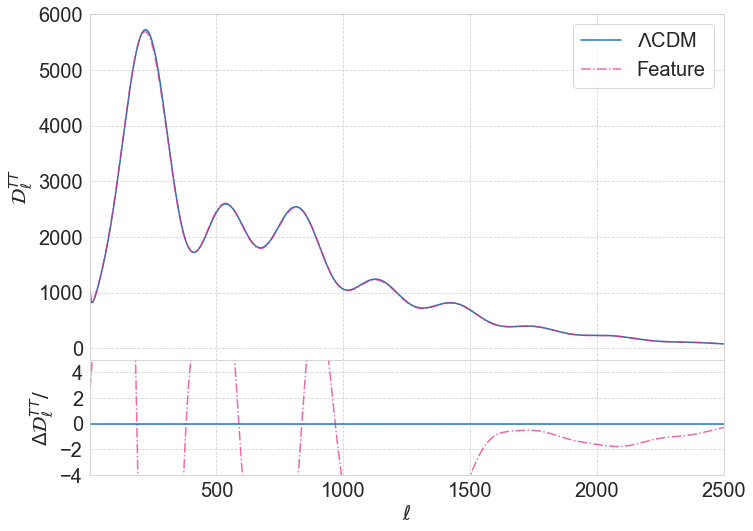

In [6]:
#------------------------------------------------------------------------------------------------
#Plot D_l^TT: LCDM vs Feature Template
#------------------------------------------------------------------------------------------------
import seaborn as sns
fsize=20

sns.set_style("whitegrid", {
    'grid.color': 'lightgray',      
    'grid.linestyle': '--',   
    'axes.facecolor': 'white'  
})

palette = sns.color_palette("Dark2", 4) 

fig = plt.figure(figsize=(11,8))
frame1 = fig.add_axes((.1,.3,.8,.6))
#plt.xscale('log');plt.yscale('linear');
plt.xlim(2,2500)
plt.xlabel('${\ell}$', fontsize=fsize)
#plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$', fontsize=15)
plt.ylabel('$\mathcal{D}^{TT}_{\ell}$', fontsize=fsize)
plt.plot(ll,Dls(ll,clTT_LCDM), label="$\Lambda$CDM")
plt.plot(ll,Dls(ll,clTT_Feat), '-.', color = palette[3], alpha=0.7, label="Feature")
plt.legend(fontsize=fsize)
plt.xticks(fontsize=1)
plt.yticks(fontsize=fsize)

#RESIDUAL PLOT
frame2 = fig.add_axes((.1,.1,.8,.2), sharex=frame1) 

diff = []
for i in range(len(ll)):
    diff.append(Dls(ll,clTT_Feat)[i] - Dls(ll,clTT_LCDM)[i]) #int because i outputs a .0 number, not integer

plt.plot(ll, diff, '-.', color = palette[3], alpha=0.7)
plt.ylim(-4,5)
plt.ylabel('$\Delta \mathcal{D}^{TT}_{\ell}/$', fontsize=fsize)
plt.xlabel('${\ell}$', fontsize=fsize)
frame2.axhline(y=0)
plt.xticks(fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.savefig('./FeatureCTT.pdf')
plt.show()

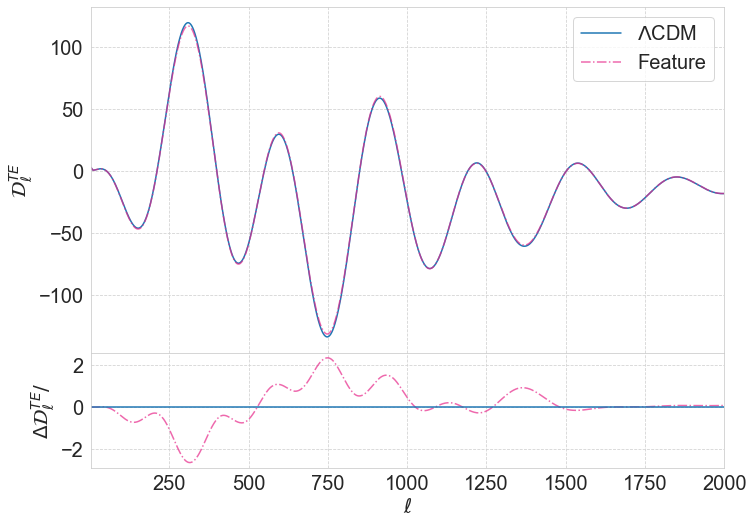

In [7]:
#------------------------------------------------------------------------------------------------
#Plot D_l^TE: LCDM vs Feature Template
#------------------------------------------------------------------------------------------------

sns.set_style("whitegrid", {
    'grid.color': 'lightgray', 
    'grid.linestyle': '--',    
    'axes.facecolor': 'white'  
})

palette = sns.color_palette("Dark2", 4) 

fig = plt.figure(figsize=(11,8))
frame1 = fig.add_axes((.1,.3,.8,.6))
#plt.xscale('log');plt.yscale('linear');
plt.xlim(2,2000)
plt.xlabel('${\ell}$', fontsize=fsize)
#plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$', fontsize=15)
plt.ylabel('$\mathcal{D}^{TE}_{\ell}$', fontsize=fsize)
plt.plot(ll,Dls(ll,clTE_LCDM), label="$\Lambda$CDM")
plt.plot(ll,Dls(ll,clTE_Feat),'-.', color = palette[3], alpha=0.7, label="Feature")
plt.legend(fontsize=fsize)
plt.xticks(fontsize=1)
plt.yticks(fontsize=fsize)

#RESIDUAL PLOT
frame2 = fig.add_axes((.1,.1,.8,.2), sharex=frame1) 

diff = []
for i in range(len(ll)):
    diff.append((Dls(ll,clTE_Feat)[i] - Dls(ll,clTE_LCDM)[i])) #int because i outputs a .0 number, not integer

plt.plot(ll, diff, '-.', color = palette[3], alpha=0.7)
plt.ylabel('$\Delta \mathcal{D}^{TE}_{\ell}/$', fontsize=fsize)
plt.xlabel('${\ell}$', fontsize=fsize)
frame2.axhline(y=0)
plt.xticks(fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.savefig('./FeatureCTE.pdf')
plt.show()

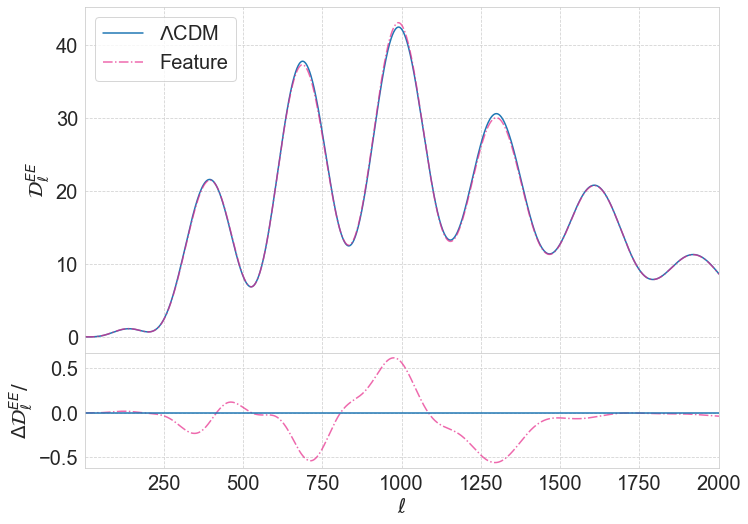

In [8]:
#------------------------------------------------------------------------------------------------
#Plot D_l^EE: LCDM vs Feature Template
#------------------------------------------------------------------------------------------------
sns.set_style("whitegrid", {
    'grid.color': 'lightgray',      
    'grid.linestyle': '--',    
    'axes.facecolor': 'white'  
})

palette = sns.color_palette("Dark2", 4) 

fig = plt.figure(figsize=(11,8))
frame1 = fig.add_axes((.1,.3,.8,.6))
#plt.xscale('log');plt.yscale('linear');
plt.xlim(2,2000)
plt.xlabel('${\ell}$', fontsize=fsize)
#plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$', fontsize=15)
plt.ylabel('$\mathcal{D}^{EE}_{\ell}$', fontsize=fsize)
plt.plot(ll,Dls(ll,clEE_LCDM), label="$\Lambda$CDM")
plt.plot(ll,Dls(ll,clEE_Feat), '-.', color = palette[3], alpha=0.7, label="Feature")
plt.legend(loc="upper left", fontsize=fsize)
plt.xticks(fontsize=1)
plt.yticks(fontsize=fsize)

#RESIDUAL PLOT
frame2 = fig.add_axes((.1,.1,.8,.2), sharex=frame1) 

diff = []
for i in range(len(ll)):
    diff.append((Dls(ll,clEE_Feat)[i] - Dls(ll,clEE_LCDM)[i])) #int because i outputs a .0 number, not integer

plt.plot(ll, diff, '-.', color = palette[3], alpha=0.7)
plt.ylabel('$\Delta \mathcal{D}^{EE}_{\ell}/$', fontsize=fsize)
plt.xlabel('${\ell}$', fontsize=fsize)
frame2.axhline(y=0)
plt.xticks(fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.savefig('./FeatureCEE.pdf')
plt.show()

## Plot the power spectrum and the feature

In [9]:
#Get P(k) at redhsift z=0

kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk_LCDM = [] # P(k) in (Mpc/h)**3
Pk_Feat = [] # P(k) in (Mpc/h)**3
h1 = LambdaCDM.h() #Get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk_LCDM.append(LambdaCDM.pk(k*h1,0.)*h1**3) # function .pk(k,z)
h2 = Feat_T.h() #Get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk_Feat.append(Feat_T.pk(k*h2,0.)*h2**3) # function .pk(k,z)

(array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
 <a list of 8 Text major ticklabel objects>)

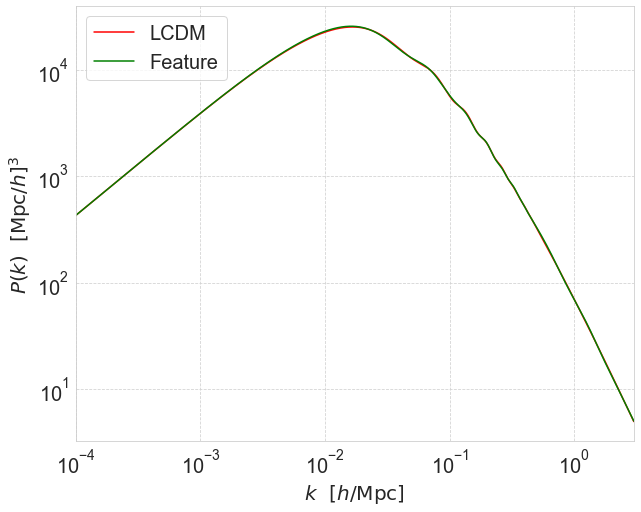

In [12]:
#------------------------------------------------------------------------------------------------
#Plot the Power Spectrum
#------------------------------------------------------------------------------------------------
fig = plt.figure(figsize=(10,8))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$', fontsize=fsize)
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$', fontsize=fsize)
plt.plot(kk,Pk_LCDM,'r-', label="LCDM")
plt.plot(kk,Pk_Feat,'g-', label="Feature")
plt.legend(loc="upper left", fontsize=fsize)
plt.xticks(fontsize=fsize)
plt.yticks(fontsize=fsize)

(array([-600., -400., -200.,    0.,  200.,  400.,  600.]),
 <a list of 7 Text major ticklabel objects>)

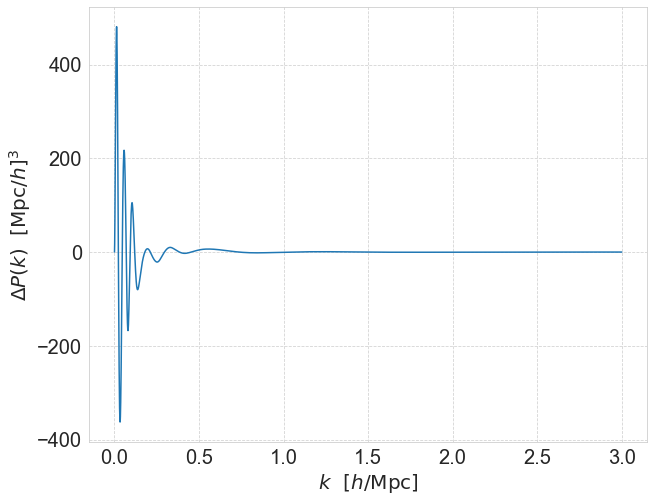

In [13]:
#------------------------------------------------------------------------------------------------
#Plot the Feature in the primordial power spectrum
#------------------------------------------------------------------------------------------------
fig = plt.figure(figsize=(10,8))
plt.plot(kk,[Pk_Feat[i]-Pk_LCDM[i] for i in range(len(Pk_Feat))], label="Feature")
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$', fontsize=fsize)
plt.ylabel(r'$\Delta P(k)\,\,\,\, [\mathrm{Mpc}/h]^3$', fontsize=fsize)
plt.xticks(fontsize=fsize)
plt.yticks(fontsize=fsize)

(array([-600., -400., -200.,    0.,  200.,  400.,  600.]),
 <a list of 7 Text major ticklabel objects>)

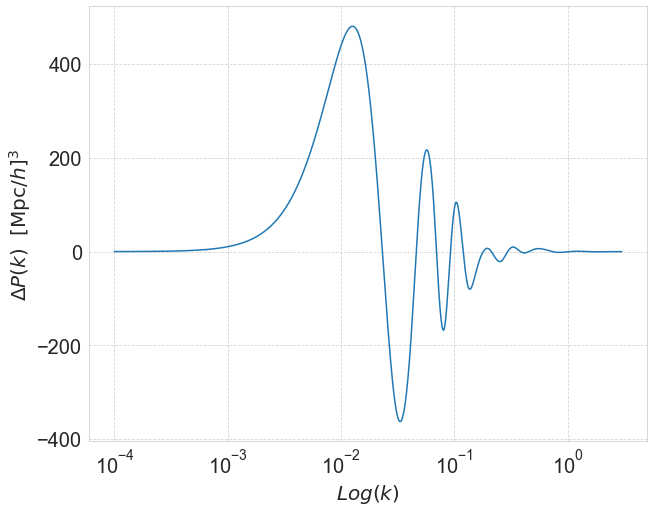

In [15]:
#Log Plot of the Feature
fig = plt.figure(figsize=(10,8))
plt.xscale('log');plt.yscale('linear')
plt.plot(kk,[Pk_Feat[i]-Pk_LCDM[i] for i in range(len(Pk_Feat))], label="Feature")
plt.xlabel(r'$Log(k)$', fontsize=fsize)
plt.ylabel(r'$\Delta P(k)\,\,\,\, [\mathrm{Mpc}/h]^3$', fontsize=fsize)
plt.xticks(fontsize=fsize)
plt.yticks(fontsize=fsize)

(array([-0.0125, -0.01  , -0.0075, -0.005 , -0.0025,  0.    ,  0.0025,
         0.005 ,  0.0075,  0.01  ,  0.0125]),
 <a list of 11 Text major ticklabel objects>)

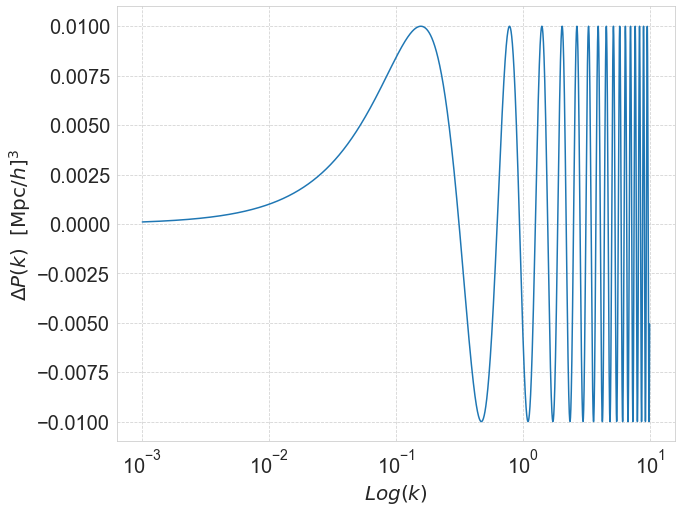

In [16]:
#Semi-log plot of the Feature
fig = plt.figure(figsize=(10,8))
ks = np.logspace(-3,1, 10000)
Ax = 0.01
Om_X = 10.
dpk= Ax*np.sin(Om_X*ks)
plt.semilogx(ks,dpk)
plt.xlabel(r'$Log(k)$', fontsize=fsize)
plt.ylabel(r'$\Delta P(k)\,\,\,\, [\mathrm{Mpc}/h]^3$', fontsize=fsize)
plt.xticks(fontsize=fsize)
plt.yticks(fontsize=fsize)

In [ ]:
#Reset parameters to default in case you want 
#To set different parameters, rerun LambdaCDM.compute()
LambdaCDM.empty()
Feat_T.empty()